# TP 5 : Hawkes Processes

## I. One-dimensional Hawkes processes

### 1. Definition of a linear self-exciting process

A general definition for a linear self-exciting process $N$ reads
$$\lambda(t) = \lambda_0(t) + \int_{-\infty}^t\varphi(t − s)dN_s=\lambda_0(t) + \sum_{t_i<t}\varphi(t − t_i ),$$
where $\lambda_0 : \mathbb{R}\mapsto\mathbb{R}_+$ is a deterministic base intensity and $\varphi : \mathbb{R}_+\mapsto\mathbb{R}_+$
expresses the positive influence of the past events $t_i$ on the current value of the intensity process.

Hawkes (1971) proposes an exponential kernel $\varphi(t) = \sum_{j=1}^P\alpha_j e^{−\beta_j t}\mathbb{1}_{\mathbb{R}_+}$, so that the intensity of the model becomes
$$\lambda(t) = \lambda_0(t) +\int_0^t\sum_{j=1}^P\alpha_j e^{−\beta_j (t−s)}dN_s=\lambda_0(t) + \sum_{t_i<t}\sum_{j=1}^P\alpha_je^{-\beta_j(t-t_i)}.$$
The simplest version with $P = 1$ and $\lambda_0(t)=\mu$ constant is defined as
$$\lambda(t) = \mu + \int_0^t\alpha e^{−\beta(t−s)}dN_s=\mu+\sum_{t_i<t}\alpha e^{-\beta(t-t_i)}.$$

### 2. Stationnarity

Stationarity condition for a 1D-Hawkes process
$$\sum_{j=1}^P\frac{\alpha_j}{\beta_j}<1.$$

**Average intensity of a stationary process** : for the one-dimensional Hawkes process with $P = 1$ the unconditional expected value of the intensity process is given by
$$\mathbb{E}[\lambda(t)] = \frac{\mu}{1−\alpha/\beta}.$$

### 3. Simulation of a Hawkes process

Ogata (1981) proposes an algorithm for the simulation of Hawkes processes. Let us denote $\mathcal{U}_{[0,1]}$ the uniform distribution on the interval $[0,1]$ and $[0,T]$ the time interval on which the process is to be simulated. We’ll assume here that $P = 1$.

**1. Initialization** : Set $\lambda^*\leftarrow\mu$, $n\leftarrow1$.

**2. First event** : Generate $U\sim\mathcal{U}_{[0,1]}$ and set $s\leftarrow-\frac{1}{\lambda^*}\ln U$.

**If** $s\leq T$,

   **Then** $t_1\leftarrow s$,
    
**Else** go to last step.

**3. General routine** : Set $n\leftarrow n + 1$.
    
_a. Update maximum intensity_: Set $\lambda^*\leftarrow\lambda(t_{n−1}) + \alpha$. 

$\lambda^*$ exhibits a jump of size $\alpha$ as an event has just occurred. $\lambda$ being left-continuous, this jump is not counted in $\lambda(t_{n−1})$, hence the explicit addition.

_b. New event_ : Generate $U\sim\mathcal{U}_{[0,1]}$ and set $s\leftarrow s-\frac{1}{\lambda^*}\ln U$.

**If** $s\geq T$,

**Then** go to the last step.

_c. Rejection test_ : Generate $D\sim\mathcal{U}_{[0,1]}$.

**If** $D\leq\frac{\lambda(s)}{\lambda^*}$,

**Then** $t_n\leftarrow s$ and go through the general routine again,

**Else** update $\lambda^*\leftarrow\lambda(s)$ and try a new date at step b. of the general
routine.

**4. Output**: Retrieve the simulated process $(t_n)_n$ on $[0,T]$.

Simulation of a one-dimensional Hawkes process with parameters $P = 1$, $\lambda_0 = 1.2$, $ \alpha= 0.6$, $\beta = 0.8$.

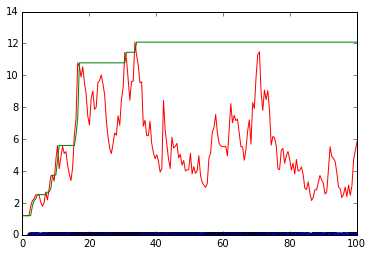

### Testing the simulated process

For any consecutive events $t_{i−1}$ and $t_i$
\begin{eqnarray*}
\Lambda(t_{i−1},t_i)&=&\int^{t_i}_{t_{i−1}}\lambda(s)ds=\int_{t_i}^{t_{i−1}}\lambda_0(s)ds +\int^{t_i}_{t_{i−1}}\sum_{t_k<s}\alpha e^{-\beta(s−t_k)}ds\\
&=&\int_{t_i}^{t_{i−1}}\lambda_0(s)ds +\int^{t_i}_{t_{i−1}}\sum_{t_k<t_{i-1}}\alpha e^{-\beta(s−t_k)}ds\\
&=&\int_{t_i}^{t_{i−1}}\lambda_0(s)ds +\sum_{t_k<t_i}\frac{\alpha}{\beta}\left(e^{-\beta(t_{i-1}−t_k)}-e^{-\beta(t_i−t_k)}\right)
\end{eqnarray*}

This computation can be simplified with a recursive element. Let us denote
$$A_{i−1} = \sum_{t_k\leq t_{i−1}}e^{−\beta(t_{i−1}−t_k)}.$$
We observe that
$$A_{i−1}=1+e^{−\beta(t_{i−1}−t_{i−2})}\sum_{t_k\leq t_{i−2}}e^{−\beta(t_{i−2}−t_k)}=1+e^{−\beta(t_{i−1}−t_{i−2})}A(i−2).$$
Finally, the integrated density can be written for all $i\in\mathbb{N}^*$,
$$\Lambda(t_{i−1},t_i)=\int_{t_{i-1}}^{t_i}\lambda_0(s)ds + \frac{\alpha}{\beta}\left(1−e^{−\beta(t_i−t_{i−1})}\right)A_{i−1},$$
where $A$ is defined as above with $A_0 = 0$.

**Time change property**

Let define $\{\tau_i\}$ as
$$\tau_0= \int_0^{t_0}\lambda(s)ds = \Lambda(0,t_0),$$
$$\tau_i = \tau_{i−1} + \Lambda(t_{i−1}, t_i).$$
The durations $\tau_i−\tau_{i−1}=\Lambda(t_{i−1},t_i)$ are exponentially distributed.

### 4. Maximum-likelihood estimation of one-dimensional Hawkes process

#### a. Computation of the log-likelihood function

The log-likelihood of a simple point process $N$ with intensity $\lambda$ is written
$$\ln{\cal L}((N_t)_{t\in[0,T]}) = -\int_0^T\lambda(s)ds+\int_0^T\ln\lambda(s)dN_s,$$
which in the case of a Hawkes model can be explicitly computed as
$$\ln{\cal L}(\{t_i\}_{i=1,\ldots,n})=−\Lambda(0,t_n)+\sum_{i=1}^n\ln\lambda(t_i)=−\Lambda(0,t_n)+\sum_{i=1}^n\ln\left(\lambda_0(t_i)+\sum_{j=1}^P\sum_{k=1}^{i-1}\alpha_je^{−\beta_j(t_i−t_k)}\right).$$
As noted by Ogata (1981), this log-likelihood function is easily computed with a recursive formula. We observe that
$$A_j(i)=\sum_{k=1}^{i-1}e^{−\beta_j(t_i−t_k)}=e^{−\beta(t_i−t_{i−1})}\sum_{k=1}^{i-1}e^{−\beta_j(t_{i−1}−t_k)}=e^{−\beta_j(t_i−t_{i−1})}\left(1+\sum_{k=1}^{i-2}e^{−\beta_j(t_{i−1}−t_k)}\right)=e^{−\beta_j(t_i−t_{i−1})}(1+A_j(i−1)).$$
The log-likelihood can thus be recursively computed with
$$\ln{\cal L}(\{t_i\}_{i=1,\ldots,n})=−\Lambda(0,t_n)+\sum_{i=1}^n\ln\left(\lambda_0(t_i)+\sum_{j=1}^P\alpha_jA_j(i)\right),$$
where $A$ is defined above and $\forall j$, $A_j(0)=0$.

Direct computation of $\Lambda(0,t_n)$ yields to
$$\ln{\cal L}(\{t_i\}_{i=1,\ldots,n})=−\int_0^{t_n}\lambda_0(s)ds − \sum_{i=1}^n\sum_{j=1}^P\frac{\alpha_j}{\beta_j}\left(1−e^{−\beta_j (t_n−t_i)}\right) + \sum_{i=1}^n\ln\left(\lambda_0(t_i)+\sum_{j=1}^P\alpha_jA_j(i)\right).$$
When $P=1$ and $\lambda_0(t)=\mu$ constant, we obtain
$$\ln{\cal L}(\{t_i\}_{i=1,\ldots,n})=−\mu t_n − \sum_{i=1}^n\frac{\alpha}{\beta}\left(1−e^{−\beta (t_n−t_i)}\right) + \sum_{i=1}^n\ln\left(\mu+\alpha A(i)\right).$$

#### b. Properties of the maximum-likelihood estimator

Ogata (1978) shows that for a stationary one-dimensional Hawkes process with constant $\lambda_0$ and $P = 1$, the maximum-likelihood estimator $\hat{\theta}^T = (\hat{\lambda}_0,\hat{\alpha}_1,\hat{\beta}_1)$ is 

* _consistent_, $i.e.$ converges in probability to the true values $\theta^T = (\lambda_0, \alpha_1, \beta_1)$ as $T\to\infty$,
* _asymptotically normal_, $i.e.$
$$\sqrt{T}(\hat{\theta}-\theta)\overset{{\cal L}}{\rightarrow}{\cal N}(0,\Sigma),$$
* _asymptotically efficient_, $i.e.$ asymptotically reaches the lower bound of the variance.

### 5. Implementation

* Simulate a one-dimensional Hawkes process.

* Test your simulated process. Comment.

* Study the log-likehood with respect to the parameters $\mu$, $\alpha$ and $\beta$. Comment.

## II. Multidimensionnal Hawkes processes

### 1. Definition

Let $M\in\mathbb{N}^*$. Let $\{(t^m_i)_i\}_{m=1,\ldots,M}$ be a $M$-dimensional point process. We will denote $N_t = (N^1_t,\ldots,N^M_t)$ the associated counting process.

A multidimensional Hawkes process is defined with intensities $\lambda^m$, $m = 1,\ldots,M$ given by
$$\lambda^m(t) = \lambda^m_0(t) + \sum_{n=1}^M\int_0^t\sum_{j=1}^P\alpha^{mn}_j e^{−\beta^{mn}_j(t−s)}dN^n_s,$$
$i.e.$ in its simplest version with $P = 1$ and $\lambda^m_0(t)$ constant
$$\lambda^m(t) = \mu^m + \sum_{n=1}^M\int_0^t\alpha^{mn} e^{−\beta^{mn}(t−s)}dN^n_s = \mu^m + \sum_{n=1}^M\sum_{t^n_i<t}\alpha^{mn} e^{−\beta^{mn}(t−t_i^n)}dN^n_s.$$

### 2. Stationarity condition

We’ll take here $P=1$ to simplify the notations. Using vectorial notation, we have
$$\boldsymbol{\lambda}(t) = \boldsymbol{\mu}+\int_0^t\boldsymbol{\Phi}(t − s)dN_s,$$
where
$$\boldsymbol{\Phi}(t)=\left(\alpha^{nm}e^{-\beta^{nm}(t-s)}\right)_{m,n=1,...,M}.$$
Assuming stationarity gives $\mathbb{E}[\boldsymbol{\lambda}(t)] =\boldsymbol{m}$ constant vector, and thus stationary intensities must satisfy
$$\boldsymbol{m}=\left(\boldsymbol{I} −\int_0^{\infty}\boldsymbol{\Phi}(u)du\right)^{-1}\boldsymbol{\mu}.$$


A sufficient condition for a multivariate Hawkes process to be linear is that the spectral radius of the matrix
$$\Gamma=\int_0^{\infty}\boldsymbol{\Phi}(u)du=\left(\frac{\alpha^{nm}}{\beta^{nm}}\right)_{1\leq n,m\leq M}$$
be strictly smaller than 1.


We recall that the spectral radius of the matrix $\boldsymbol{\Phi}$ is defined as
$$\rho(\boldsymbol{\Phi})=\max_{a\in \mbox{Sp}(\boldsymbol{\Phi})}|a|,$$
where $\mbox{Sp}(\boldsymbol{\Phi})$ denotes the set of all eigenvalues of $\boldsymbol{\Phi}$.

### 3. Simulation of a multivariate Hawkes process

We generalize the 1D-algorithm in a multidimensional setting. We recall that $\mathcal{U}_{[0,1]}$ denotes the uniform distribution on the interval $[0, 1]$, $[0,T]$ is the time interval on which the process is to be simulated, and we define
$$I^K(t)=\sum_{n=1}^K\lambda^n(t)$$
the sum of the intensities of the first $K$ components of the multivariate process. $I^M(t)=\sum_{n=1}^M\lambda^n(t)$ is thus the total intensity of the multivariate process and we set $I^0=0$. The algorithm is then rewritten as follows.


**1. Initialization** : Set $i\leftarrow1$, $i^1\leftarrow1$, $\ldots$, $i^M\leftarrow1$ and $I^*\leftarrow I^M(0) = \sum_{n=1}^M\lambda^n(0)$.

**2. First event** : Generate $U\sim\mathcal{U}_{[0,1]}$ and set $s\leftarrow−\frac{1}{I^*}\ln U$.

**If** $s > T$ **Then** go to last step.

**Attribution Test** : Generate $D\sim\mathcal{U}_{[0,1]}$ and set $t^{n_0}_1\leftarrow s$ where $n_0$ is such that $\frac{I^{
n_0−1}(0)}{I^*}< D \leq \frac{I^{n_0}(0)}{I^*}$.

Set $t_1\leftarrow t^{n_0}_1$.

**3. General routine** : Set $i^{n_0}\leftarrow i^{n_0+1}$ and $i \leftarrow i + 1$.

**a. Update maximum intensity**: Set $I^*\leftarrow I^M(t_{i−1})+\sum_{n=1}^M\sum_{j=1}^P\alpha^{nn_0}$.

**b. New event** : Generate $U\sim\mathcal{U}_{[0,1]}$ and set $s\leftarrow−\frac{1}{I^*}\ln U$.

**If** $s > T$, **Then** go to the last step.

**c. Attribution-Rejection test** : Generate $D\sim\mathcal{U}_{[0,1]}$.

and set $t^{n_0}_1\leftarrow s$ where $n_0$ is such that 

**If** $D\leq \frac{I^M(s)}{I^*}$, **Then** set $t^{n_0}_i\leftarrow s$ where $n_0$ is such that $\frac{I^{
n_0−1}(s)}{I^*}< D \leq \frac{I^{n_0}(s)}{I^*}$, and $t_i\leftarrow t^{n_0}_{i^{n_0}}$ and go through the general routine again.

**Else** update $I^*\leftarrow I^M(s)$ and try a new date at step **b.** of the general routine.

**4. Output**: Retrieve the simulated process $(t_i^n)_{i,n}$ on $[0,T]$.


**Remark.** You can also test the simulated data with qq-plots as in the one-dimensional case.

### 4. Estimation : log-likelihood function

The log-likelihood of a multidimensional Hawkes process can be computed as the sum of the likelihood of each coordinate, $i.e.$ is written
$$\ln{\cal L}(\{t_i\}_{i=1,\ldots,N}) = \sum_{m=1}^M\ln{\cal L}^m(\{t_i\}),$$
where each term is defined by
$$\ln{\cal L}^m(\{t_i\}) = -\int_0^T\lambda^m(s) ds + \int_0^T\ln\lambda^m(s)dN^m_s.$$

In the case of a multidimensional Hawkes process, denoting $\{t_i\}_{i=1,\ldots,N}$ the ordered pool of all events $\{\{t^m_i\}_{m=1,\ldots,M}\}$, this log-likelihood can be computed as
$$\ln{\cal L}^m(\{t_i\}) = − \Lambda^m(0,T) +\sum_{i=1}^Nz^m_i\ln\left(\lambda^m_0(t_i)+\sum_{n=1}^M\sum_{j=1}^P\sum_{t^n_k<t_i}\alpha^{mn}_j e^{−\beta^{mn}_j(t_i−t^n_k)}\right),$$
where $z^m_i$ is equal to 1 if the event $t_i$ is of type $m$, 0 otherwise.

As in the one dimensional case, this can be computed in a recursive way.
We observe that
$$A^{mn}_j(l)=\sum_{t^n_k<t^m_l}e{−\beta^{mn}_j(t^m_l −t^n_k)}=\left\{\begin{array}{lcr}
e^{−\beta^{mn}_j(t^m_l −t^m_l−1)}A^{mn}_j(l−1) +\sum_{t^m_{l−1}\leq t^n_k<t^m_l}e{−\beta^{mn}_j(t^m_l −t^n_k)} &  \mbox{if} & m\neq n, \\
e^{−\beta^{mn}_j(t^m_l −t^m_l−1)}(1+A^{mn}_j(l−1)) &  \mbox{if} & m= n.
\end{array}\right.$$

The final expression of the log-likelihood may be written
$$\ln{\cal L}^m(\{t_i\}) = − \sum_{i=1}^N\sum_{n=1}^M\sum_{j=1}^P\frac{\alpha^{mn}_j}{\beta^{mn}_j}\left(1 − e^{−\beta^{mn}_j (T−t_i)}\right)+\sum_{t^m_l}\ln\left(\lambda^m_0(t^m_l)+\sum_{n=1}^M\sum_{j=1}^P\alpha^{mn}_jR^{mn}_j(l)\right)$$
where $R^{mn}_j(l)$ is defined above and $R^{mn}_j(0)=0$.

## III. A one-dimensional price model

### 1. Presentation

Bacry, Delattre, Hoffmann & Muzy (2011) propose a one-dimensional case where the price $p$ is written
$$p(t) = N^1(t) − N^2(t),$$
where $N^i$, $i\in\{1, 2\}$ is a Hawkes process with intensities $\lambda_i$, $i\in\{1,2\}$ such that
$$\lambda_1(t)= \mu + \int_{−\infty}^t\alpha e^{−\beta(t−s)}dN^2_s,$$
$$\lambda_2(t)= \mu + \int_{−\infty}^t\alpha e^{−\beta(t−s)}dN^1_s.$$
* No self-excitation of upward (resp. downward) jumps on following upward (resp. downward) jumps.
* Only cross-excitation terms are kept, enforcing the mean-reversion empirically observed on the price $p$.
* Cross-excitation is set to be symmetric.

### 2. An analytical expression for the variance of the price

A volatility signature plot plots the realized variance as a function of the sampling period
$$RV(\tau)=\frac{1}{\tau}\sum_{i=1}^I(\hat{p}(i\tau)−\hat{p}((i−1)\tau))^2$$
where $I$ is the number of observations $\hat{p}$. Bacry et al. (2011) shows that the theoretical signature plot of the stationary model can be theoretically computed as
$$C(\tau)=\frac{1}{\tau}\mathbb{E}[p(\tau)^2]=\Lambda\left(\kappa^2 + (1 − \kappa^2)\frac{1−e^{−\gamma\tau}}{\gamma\tau}\right),$$
where
$$\Lambda=\frac{2\mu}{1 − \alpha/\beta}, \quad \kappa=\frac{1}{1+\alpha/\beta} \quad\mbox{and}\quad \gamma=\alpha+\beta.$$
See (Bacry et al. 2011, Appendix 1).

### 3. Log-likehood

Consequently the log-likelihood functions $\theta\to\ln L_1(\theta)$ and $\theta\to\ln L_2(\theta)$ generated by the observation of $N^1(t)$ and $N^2(t)$ over $[0,T]$ are given by
$$\ln L_1(\theta) = \sum_{0\leq t^{(1)}_i<N^1(T)}\ln\left(\mu +\sum_{0\leq t^{(2)}_j <N^2(T)}\alpha e^{−\beta(t^{(1)}_i−t^{(2)}_j)}\right)-\mu T−\sum_{0\leq t^{(2)}_j <N^2(T)}\frac{\alpha}{\beta}\left(1−e^{−\beta(T−t^{(2)}_j)}\right),$$
$$\ln L_2(\theta) = \sum_{0\leq t^{(2)}_i<N^2(T)}\ln\left(\mu +\sum_{0\leq t^{(1)}_j <N^2(T)}\alpha e^{−\beta(t^{(2)}_i−t^{(1)}_j)}\right)-\mu T−\sum_{0\leq t^{(1)}_j <N^1(T)}\frac{\alpha}{\beta}\left(1−e^{−\beta(T−t^{(1)}_j)}\right).$$

and the MLE of $\theta$ based on the observation of $p(t)$ over $[0,T]$ is thus given by
$$\hat{\theta}_{MLE} = \mbox{argmin}_{\theta}\left(L_1(\theta)+L_2(\theta)\right).$$
Of course, the minimisation must be performed under the constraints
$$\mu> 0, \quad\alpha>0, \quad\beta>0, \quad\mbox{and the stability condition }\frac{\alpha}{\beta}< 1.$$

### 4. Implementation

* Simulate a bi-dimensional Hawkes process with intensities defined by this model.

* Estimate the parameters $\mu$, $\alpha$ and $\beta$ with the log-likehood for a given stock.

* Compare the real signature plot with the one computed with estiamted parameters. Comment.